In [188]:
import pandas as pd

In [189]:
import yfinance as yf
import datetime as dt

In [190]:
start = dt.datetime(2013,6,1)
end = dt.datetime(2022,2,11)
stk_data = yf.download('TATACOFFEE.NS',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [191]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data
#stk_data.to_csv("Tatacoffee13_21.csv")

,Open,High,Low,Close
Date,,,,
2013-06-03,148.500000,149.750000,145.100006,146.740005
2013-06-04,145.300003,150.899994,145.300003,146.214996
2013-06-05,144.899994,147.000000,144.899994,145.949997
2013-06-06,146.500000,147.000000,145.535004,146.369995
2013-06-07,146.619995,148.485001,144.600006,145.169998
...,...,...,...,...
2022-02-04,217.500000,217.649994,213.000000,213.550003
2022-02-07,213.550003,215.300003,210.199997,211.649994
2022-02-08,212.000000,213.500000,208.100006,210.750000


In [5]:
#column="Close"

In [192]:
import warnings
warnings.filterwarnings("ignore")

In [193]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.varmax import VARMAX
    model = VARMAX(stk_data, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(stk_data)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(stk_data,y_pred)
    print("------------------")

RMSE-Testset: 2.2821834870674
maPe-Testset: 0.011687148510443739
------------------
RMSE-Testset: 2.2821834870674
maPe-Testset: 0.011687148510443739
------------------
RMSE-Testset: 2.2747563364668153
maPe-Testset: 0.01165683270752857
------------------
RMSE-Testset: 2.2821834870674
maPe-Testset: 0.011687148510443739
------------------


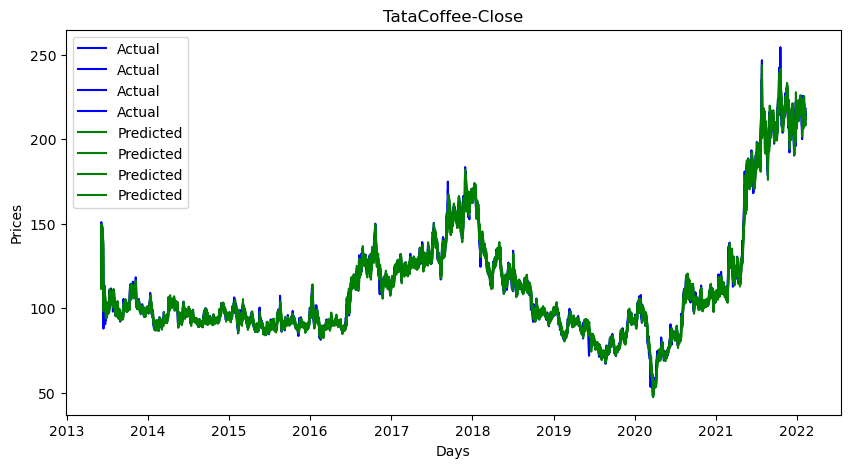

In [194]:
from stockFunctions import graph
graph(stk_data,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [195]:
Actual_y_train = pd.DataFrame(stk_data)
Actual_y_train

,Open,High,Low,Close
Date,,,,
2013-06-03,148.500000,149.750000,145.100006,146.740005
2013-06-04,145.300003,150.899994,145.300003,146.214996
2013-06-05,144.899994,147.000000,144.899994,145.949997
2013-06-06,146.500000,147.000000,145.535004,146.369995
2013-06-07,146.619995,148.485001,144.600006,145.169998
...,...,...,...,...
2022-02-04,217.500000,217.649994,213.000000,213.550003
2022-02-07,213.550003,215.300003,210.199997,211.649994
2022-02-08,212.000000,213.500000,208.100006,210.750000


In [196]:
y_pred

,Open,High,Low,Close
Date,,,,
2013-06-03,113.367157,115.304866,111.475237,113.053203
2013-06-04,147.114369,149.639933,144.572861,146.767631
2013-06-05,146.887264,148.926264,143.848300,145.426098
2013-06-06,146.738850,148.638843,144.735382,146.198097
2013-06-07,147.055772,149.012316,145.239498,146.827266
...,...,...,...,...
2022-02-04,216.906672,220.352108,213.050788,216.215608
2022-02-07,214.217437,217.413333,210.623384,213.547800
2022-02-08,212.488027,215.691675,208.865281,211.676764


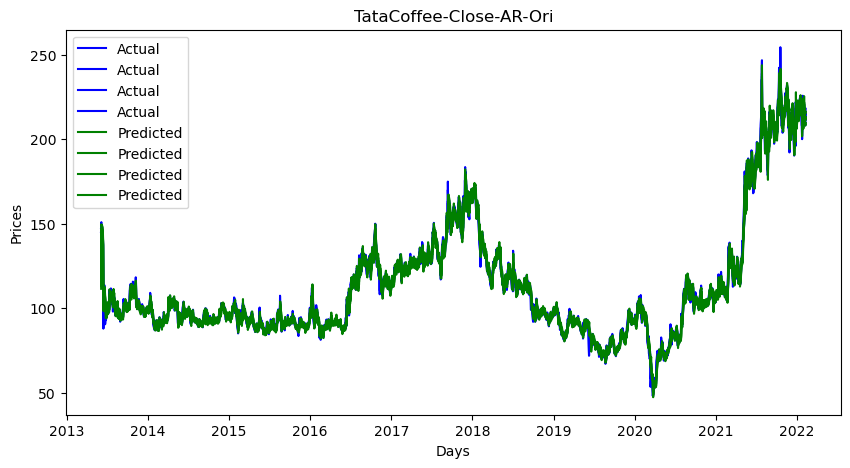

In [197]:
from stockFunctions import graph
graph(Actual_y_train,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [201]:
from stockFunctions import rmsemape
rmsemape(Actual_y_train,y_pred)

RMSE-Testset: 2.2821834870674
maPe-Testset: 0.011687148510443739


In [202]:
forecast=model_fit.predict(len(stk_data), len(stk_data)+3)

In [203]:
forecast

,Open,High,Low,Close
2144,215.504956,218.916023,211.712852,214.628610
2145,215.484643,219.104683,211.422634,214.551203
2146,215.377292,219.084775,211.216570,214.427410
2147,215.241829,218.981485,211.043761,214.284581


In [207]:
forecasted["Forecast_Open"]=forecast["Open"]
forecasted["Forecast_Close"]=forecast["Close"]
forecasted["Forecast_Low"]=forecast["Open"]
forecasted["Forecast_High"]=forecast["Close"]
forecasted

,Forecast_Open,Forecast_Close,Forecast_Low,Forecast_High
2144,215.504956,214.628610,215.504956,214.628610
2145,215.484643,214.551203,215.484643,214.551203
2146,215.377292,214.427410,215.377292,214.427410
2147,215.241829,214.284581,215.241829,214.284581


In [206]:
forecasted = pd.DataFrame()

In [210]:
forecasted = index("Date") index=df_original.index

NameError: name 'index' is not defined